Saving Table 21.1.txt to Table 21.1.txt


<ipython-input-4-cfb86b3e5fbc>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=columns)


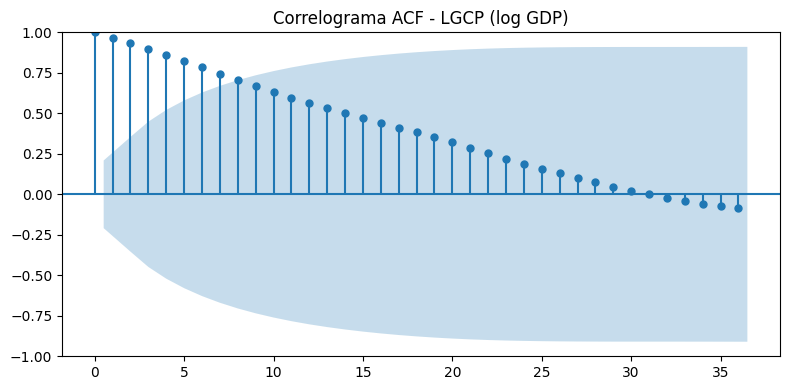


--- Prueba Dickey-Fuller ADF para LGCP (log GDP) ---
Estadístico ADF: 0.1182
Valor-p: 0.9673
¿Estacionaria?: No


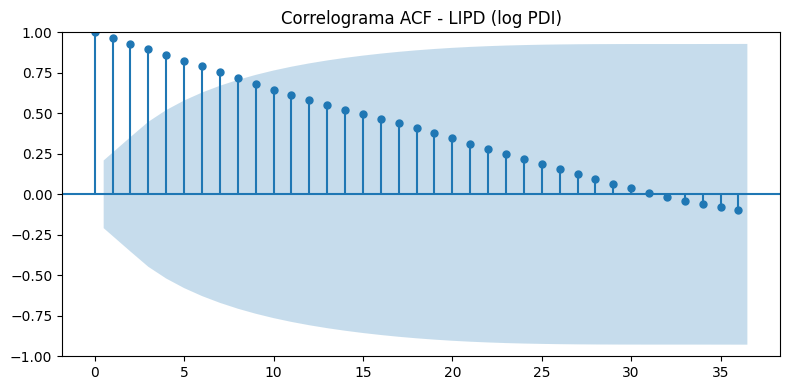


--- Prueba Dickey-Fuller ADF para LIPD (log PDI) ---
Estadístico ADF: -1.4407
Valor-p: 0.5626
¿Estacionaria?: No


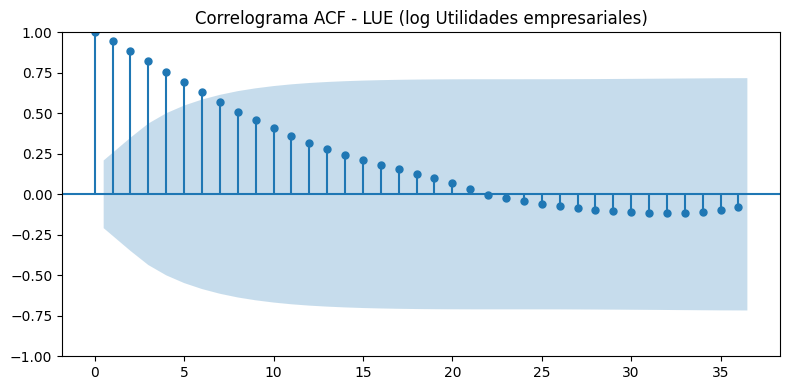


--- Prueba Dickey-Fuller ADF para LUE (log Utilidades empresariales) ---
Estadístico ADF: -2.2429
Valor-p: 0.1910
¿Estacionaria?: No


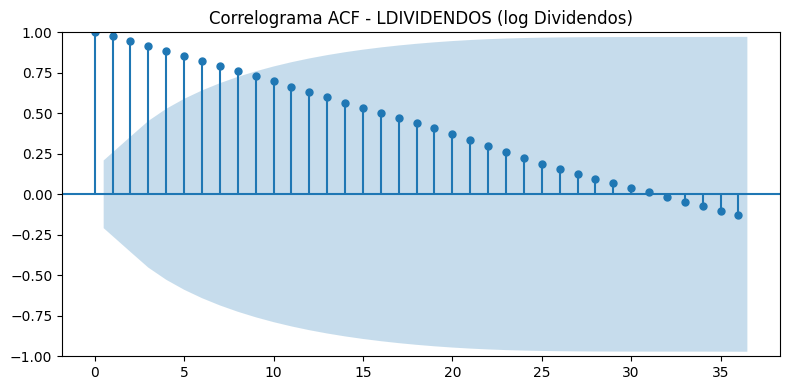


--- Prueba Dickey-Fuller ADF para LDIVIDENDOS (log Dividendos) ---
Estadístico ADF: -0.7791
Valor-p: 0.8252
¿Estacionaria?: No


In [ ]:
# Paso 1: Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from io import StringIO
from google.colab import files

# Paso 2: Subir archivo
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Paso 3: Leer solo las líneas con datos numéricos
with open(file_name, 'r') as f:
    lines = f.readlines()

# Buscar desde la línea que empieza con el primer año
data_start = [i for i, line in enumerate(lines) if line.strip().startswith("1970")][0]
data_lines = lines[data_start:]
columns = ['YEAR', 'GDP', 'PDI', 'PCE', 'PROFITS', 'DIVIDENDS']
data_str = ''.join(data_lines)
df = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=columns)

# Paso 4: Calcular logaritmos naturales
df['LGCP'] = np.log(df['GDP'])               # Log GDP
df['LIPD'] = np.log(df['PDI'])               # Log PDI
df['LUE'] = np.log(df['PROFITS'])            # Log Utilidades empresariales
df['LDIVIDENDOS'] = np.log(df['DIVIDENDS'])  # Log Dividendos

# Paso 5: Función para graficar ACF
def plot_acf_series(series, title):
    fig, ax = plt.subplots(figsize=(8, 4))
    sm.graphics.tsa.plot_acf(series, lags=36, ax=ax)
    ax.set_title(f'Correlograma ACF - {title}')
    plt.tight_layout()
    plt.show()

# Paso 6: Función para prueba Dickey-Fuller aumentada
def test_adf(series, name):
    result = adfuller(series)
    print(f'\n--- Prueba Dickey-Fuller ADF para {name} ---')
    print(f'Estadístico ADF: {result[0]:.4f}')
    print(f'Valor-p: {result[1]:.4f}')
    print('¿Estacionaria?:', 'Sí' if result[1] < 0.05 else 'No')

# Paso 7: Análisis por serie
series_dict = {
    'LGCP (log GDP)': df['LGCP'],
    'LIPD (log PDI)': df['LIPD'],
    'LUE (log Utilidades empresariales)': df['LUE'],
    'LDIVIDENDOS (log Dividendos)': df['LDIVIDENDOS']
}

for name, series in series_dict.items():
    plot_acf_series(series, name)
    test_adf(series, name)


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
!ls


 drive	 sample_data  'Table 21.1.txt'


In [8]:
!jupyter nbconvert --to html "Ejercicio - Econometrics Gujarati.ipynb"

[NbConvertApp] WARNING | pattern 'Ejercicio - Econometrics Gujarati.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_y